In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/sharanarani/Data/main/cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


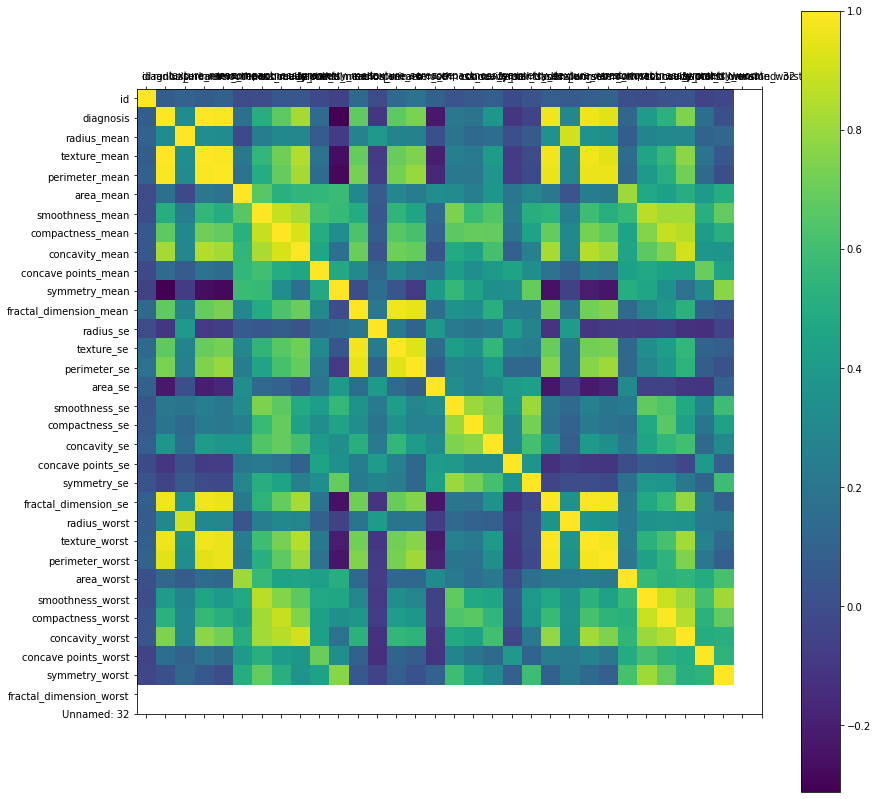

In [ ]:
rcParams['figure.figsize']=20,14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]),data.columns)
plt.xticks(np.arange(data.shape[1]),data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f578091ff90>,
      dtype=object)

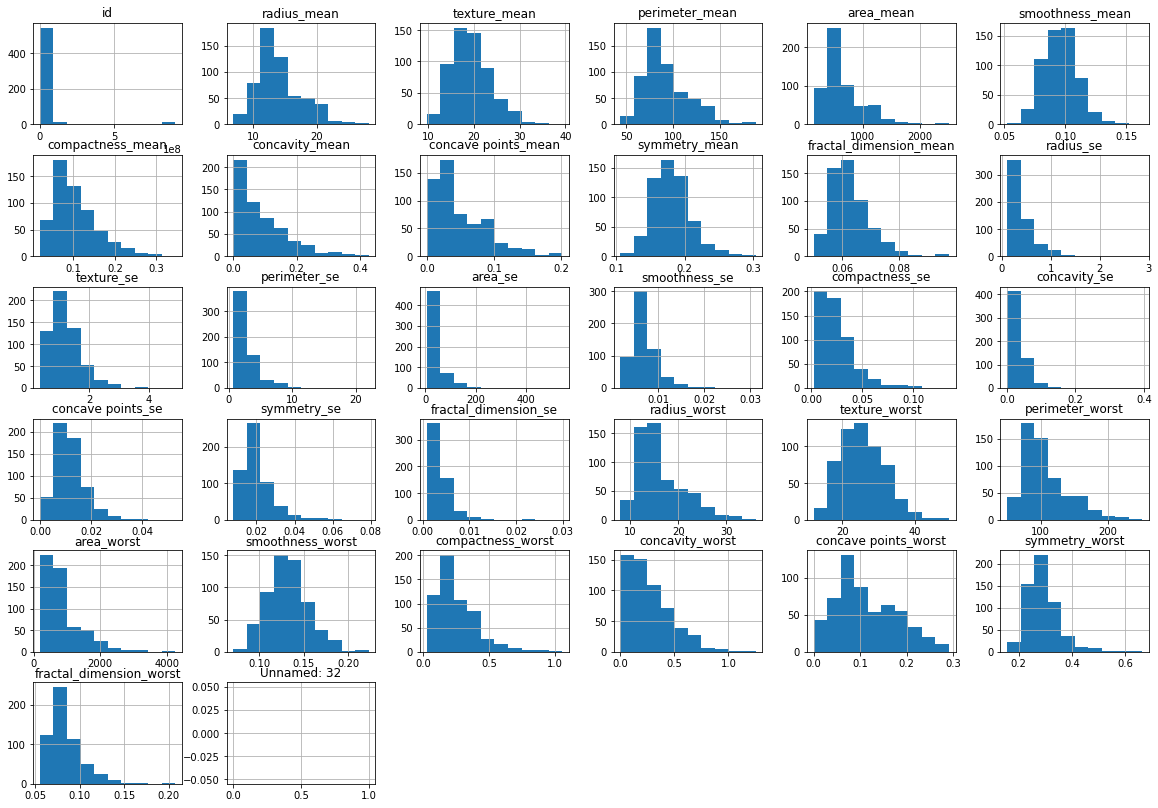

In [ ]:
data.hist()

In [ ]:
del data['id']

In [ ]:
del data['Unnamed: 32']

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(569, 31)

#**EDA**

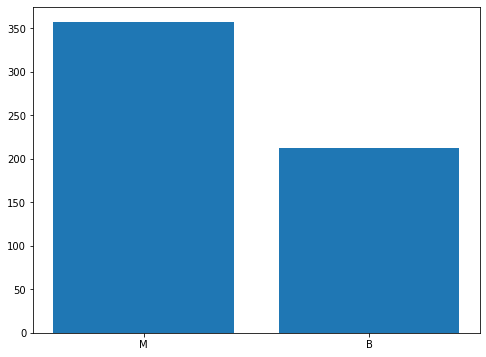

In [ ]:
data.diagnosis.value_counts()
rcParams['figure.figsize']=8,6
plt.bar(data.diagnosis.unique(), data.diagnosis.value_counts())
plt.show()

In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# We found that data is not imbalanced.

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

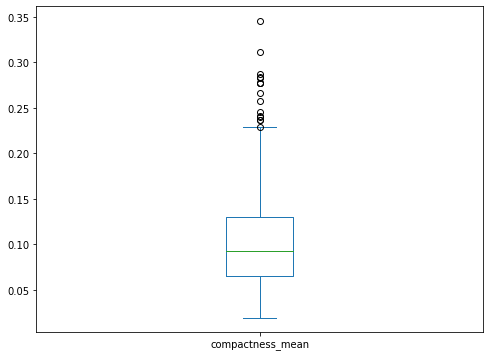

In [ ]:
data.compactness_mean.plot(kind='box')

In [ ]:
#There are outliers in every feature but SVM ignores outliers and it the best model for outliers.

#Split the data


In [ ]:
x=data.loc[:, data.columns!='diagnosis']
y=data['diagnosis']
y=y.map({'B':0, 'M':1})

In [ ]:
x[:5] # confirm if diagnosis column is excluded in x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=5)

In [ ]:
print(x_train.shape, x_test.shape)

(398, 30) (171, 30)


In [ ]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

#Fit the Model to SVM classifier

In [ ]:
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.98      0.97      0.98        61

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#Auroc score

In [ ]:
auroc=roc_auc_score(y_test, y_pred)
auroc

0.9790611028315946

#Confusion  matrix

In [ ]:
confusion_mat=confusion_matrix(y_test, y_pred)
confusion_mat

array([[109,   1],
       [  2,  59]])

#Hyper parameter tuning using gridsearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','sigmoid','poly','rbf']} 
grid=GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.924 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.925 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.912 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.875 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.962 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.899 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.925 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [ ]:
grid_pred=grid.predict(x_test)
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.98      0.97      0.98        61

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#Fit the model with best hyper param

In [ ]:
from sklearn import svm
svm_best=SVC(kernel='rbf', gamma=0.01, C=10)
svm_best.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

In [ ]:
y_ed=svm_best.predict(x_test)

In [ ]:
auroc_best_fit=roc_auc_score(y_test, y_ed)
auroc_best_fit

0.9790611028315946

In [ ]:
confusion_matrix=confusion_matrix(y_test, y_ed)
confusion_matrix

array([[109,   1],
       [  2,  59]])

#Voting classificaion

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model1=KNeighborsClassifier(3)
model2=DecisionTreeClassifier(random_state=3)
model3=LogisticRegression(random_state=3)
model=VotingClassifier(estimators=[('knn', model1),('dtc',model2),('LogReg', model3)], voting='soft')
model.fit(x_train, y_train)
auroc_res=roc_auc_score(y_test, model.predict(x_test))
auroc_res

0.9663189269746647

#Advanced Ensemble techniques

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clas_model=BaggingClassifier(SVC(kernel='rbf', random_state=3), n_estimators=100)
bag_clas_model.fit(x_train, y_train)
auroc_baggclas=roc_auc_score(y_test, bag_clas_model.predict(x_test))
auroc_baggclas

0.9790611028315946

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
x_ada_train=x_train
x_ada_test=x_test
y_ada_train=y_train
y_ada_test=y_test
adaBoost_model=AdaBoostClassifier(n_estimators=100, random_state=3 )
adaBoost_model.fit(x_ada_train, y_ada_train)
adaboost_auroc=roc_auc_score(y_ada_test,adaBoost_model.predict(x_ada_test))
adaboost_auroc

0.9790611028315946

#XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model_xgb= xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model_xgb.fit(x_train,y_train) #train the model
  model_xgb.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model_xgb.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model_xgb, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.7957179331201759  Cross-Val score :  0.6815238756933608
Learning rate :  0.02  Train score :  0.9377438538491809  Cross-Val score :  0.7896642249887531
Learning rate :  0.03  Train score :  0.9690626020185167  Cross-Val score :  0.8140164594520984
Learning rate :  0.04  Train score :  0.980832673126428  Cross-Val score :  0.821477005527728
Learning rate :  0.05  Train score :  0.9846996346417276  Cross-Val score :  0.8250669038378557
Learning rate :  0.06  Train score :  0.9868866699120451  Cross-Val score :  0.8248747762945113
Learning rate :  0.07  Train score :  0.9886464275036705  Cross-Val score :  0.8246681418241437
Learning rate :  0.08  Train score :  0.991601896571387  Cross-Val score :  0.8246079404560215
Learning rate :  0.09  Train score :  0.9910558521773369  Cross-Val score :  0.8280589187906575
Learning rate :  0.1  Train score :  0.993217894848013  Cross-Val score :  0.8251011613372716
Learning rate :  0.11  Train score :  0.99497

In [ ]:
#0.12 has higest LR.fit the model with LR .12

In [ ]:
  xgb_final= xgb.XGBRegressor(learning_rate =0.12, n_estimators=100, verbosity = 0) # initialise the model
  xgb_final.fit(x_train,y_train) #train the model
  print('r2:',model_xgb.score(x_test, y_test))
  print('auroc_xgb:', roc_auc_score(y_test,xgb_final.predict(x_test)))
  xgb_auroc=roc_auc_score(y_test,xgb_final.predict(x_test))

r2: 0.7701711433267782
auroc_xgb: 0.9859910581222057


#Bagging n estimator

In [ ]:
from sklearn.datasets import make_classification
feature=x
target=y
feature, target= make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=0,random_state=0, shuffle=False) #sqrt(30)=5

In [ ]:
bag_n_est_model=BaggingClassifier(SVC(kernel='rbf', random_state=3), n_estimators=100)
bag_n_est_model.fit(feature, target)
bag_n_est_model.predict(['testdata']))


# **comparation of all auroc scores**

In [ ]:
scores={'xgb':xgb_auroc,'adaboost': adaboost_auroc, 'bagging_class':auroc_baggclas, 'voting':auroc_res, 'svm_best':auroc_best_fit }

In [ ]:
df=pd.DataFrame(scores, index=['score'])

In [ ]:
df

,xgb,adaboost,bagging_class,voting,svm_best
score,0.985991,0.979061,0.979061,0.966319,0.979061
